In [1]:
import sys
import pickle
from pprint import pprint
import time
import datetime

In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')
backend = provider.get_backend("ibm_washington")
device = provider.backend.ibm_washington

In [4]:
sys.path.append("../../libs_bell/")
from lib_graph_states import adjacency_list_for_path_graph, list_to_matrix, path_graph_state

In [5]:
vertex_list = [16] + list(range(0,9)[::-1]) \
            + [14] + list(range(18,33))\
            + [36] + list(range(37,52)[::-1])\
            + [52] + list(range(56,71))\
            + [71] + list(range(75,90))[::-1]\
            + [90] + list(range(94,109))\
            + [112] + list(range(113,127)[::-1])
min_size = 40
max_size = len(vertex_list) # largest graph size
initial_layouts = [vertex_list[:n] for n in range(min_size, max_size + 1)] # initial_layouts
adj_lists = [adjacency_list_for_path_graph(n) for n in range(min_size, max_size + 1)] # adjacency list of graph size 1 to max_size
graphs = [list_to_matrix(adj_list) for adj_list in adj_lists] # adjacency matrix of graph size 1 to max_size
shots_per_circuit = 1 << 13 # shots per one execution

In [6]:
print("max_size:", max_size)
print("shots_per_circuit:", shots_per_circuit)
print("lengths of initial_layout:", [len(i) for i in initial_layouts])
pprint(initial_layouts[:10:2])

max_size: 105
shots_per_circuit: 8192
F_list: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100, 103]
lengths of initial_layout: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
[[16,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  0,
  14,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  36,
  51,
  50,
  49,
  48,
  47,
  46,
  45,
  44,
  43,
  42,
  41,
  40,
  39],
 [16,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  0,
  14,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  36,
  51,
  50,
  49,
  48,
  47,
  46,
  45,
  44,
  43,
  42,
  41,
  40,
  39,
  38,
  37],
 [16,
  8,
  7,
  6,
  5,
  4,
  3,
  2,

In [7]:
qcs = [path_graph_state(size) for size in range(min_size, max_size+1)]
print(len(qcs), "qcs")

66 qcs


In [8]:
from lib_path_graphs import prepare_path_graph_qcs_list, execute_circuits

In [9]:
qcs_list, nums_divide_list, nums_meas_cal_list, initial_layouts_list = \
    prepare_path_graph_qcs_list(qcs, 
                                adj_lists, 
                                backend,
                                optimization_level=1,
                                initial_layouts=[vertex_list[:qc.num_qubits] for qc in qcs])
print("the number of graph state circuits is: ", len(qcs_list))

the number of graph state circuits is:  264


In [10]:
jobs = execute_circuits(qcs_list,
                        backend=backend,
                        shots=shots_per_circuit,
                        max_experiments=900,
                        optimization_level=0)
print(len(jobs), "jobs")
print("job_id:", jobs[0].job_id())

running on ibm_washington
circuits from 0 to 264 are put on the real device.
1 jobs
job_id: 622c7f7a25b05bd1b876f9cb


In [11]:
dt_now = datetime.datetime.now()
job_ids_filename = "job_ids_" + dt_now.strftime('%Y%m%d_%H%M%S') + ".pkl"

In [12]:
with open("./pkls/" + job_ids_filename, "wb") as f:
    pickle.dump([job.job_id() for job in jobs], f)

In [13]:
with open("./pkls/" + "properties_" + dt_now.strftime('%Y%m%d_%H%M%S') + ".pkl", "wb") as f:
    pickle.dump(device.properties(), f)

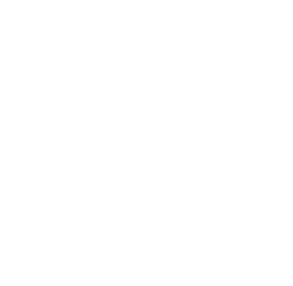

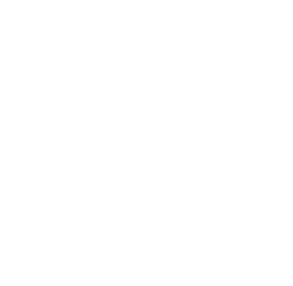

In [14]:
# from qiskit.visualization import plot_circuit_layout
# from qiskit import transpile
# qc_on_device = transpile(qcs[-1], backend=backend, optimization_level=1, initial_layout=vertex_list)
# plot_circuit_layout(qc_on_device, backend)

UnboundLocalError: local variable 'grid_data' referenced before assignment

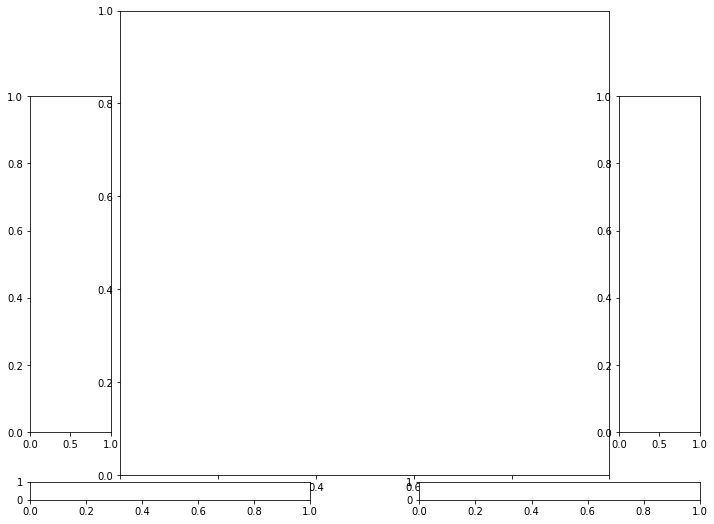

In [15]:
# from qiskit.visualization import plot_error_map
# plot_error_map(device)